## 4장. 데이터시각화

### 1. 앤스콤 데이터 집합 불러오기

In [1]:
import seaborn as sns
anscombe = sns.load_dataset("anscombe") 
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)
# plt.rcParams['lines.linewidth'] = 2
# plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [3]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

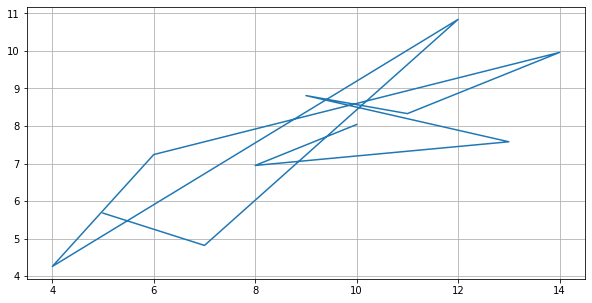

In [4]:
plt.plot(dataset_1['x'], dataset_1['y'])

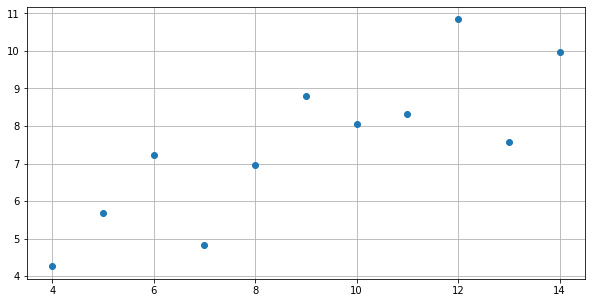

In [5]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

In [6]:
dataset_2 = anscombe[anscombe['dataset'] == 'II'] 
dataset_3 = anscombe[anscombe['dataset'] == 'III'] 
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

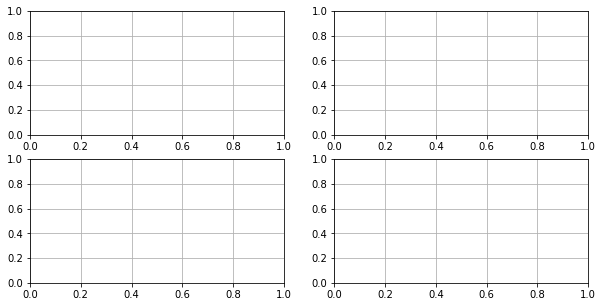

In [7]:
fig = plt.figure()
axes1 = fig.add_subplot(221)
axes2 = fig.add_subplot(222)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

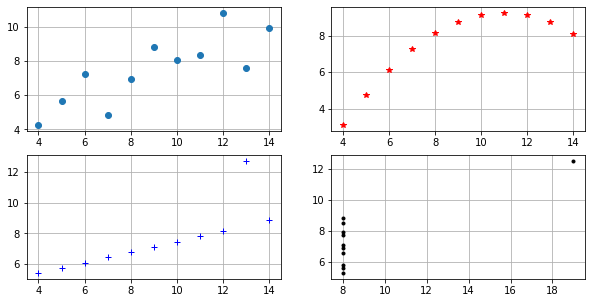

In [8]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o') 
axes2.plot(dataset_2['x'], dataset_2['y'], 'r*') 
axes3.plot(dataset_3['x'], dataset_3['y'], 'b+') 
axes4.plot(dataset_4['x'], dataset_4['y'], 'k.')

fig

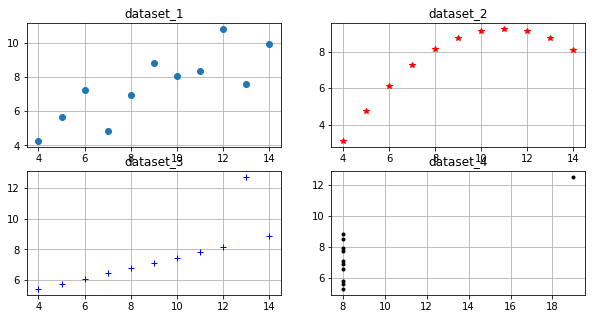

In [9]:
axes1.set_title("dataset_1") 
axes2.set_title("dataset_2")
axes3.set_title("dataset_3") 
axes4.set_title("dataset_4")

fig

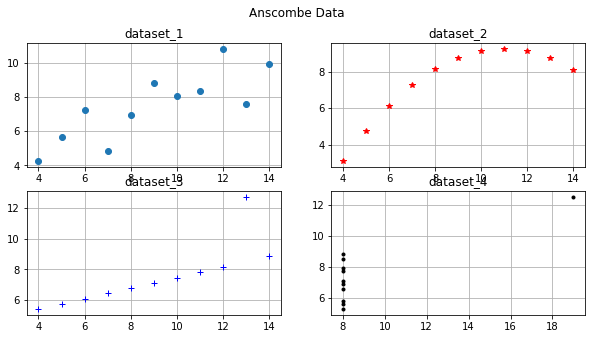

In [10]:
fig.suptitle("Anscombe Data")

fig

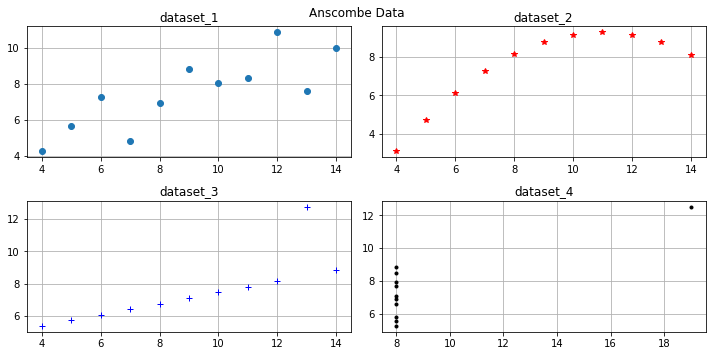

In [11]:
fig.tight_layout()

fig

### [Quiz] 아래와 같은 결과를 생성하라.

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


##### anscomes의 각 dataset 에 확장하자
1) 먼저 dataset_i 로 작업을 하면

In [13]:
import pandas as pd

문자열을 파이썬 객체로 변경하기 위해서는 eval 함수를 이용한다.

In [14]:
anscomes = []
for i in range(1, 5):
    tmp = eval('dataset_'+str(i)).describe()
    tmp.columns = [col + str(i) for col in tmp.columns]
    anscomes.append(tmp)

In [15]:
pd.concat(anscomes, axis=1)

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


2) 위 작업방식을 anscombe에서 직접 수행하면:

In [16]:
import numpy as np
anscomes = []
for i, (_, sub) in enumerate(anscombe.groupby('dataset')):
    tmp = sub.describe()
    tmp.columns = [col + str(i+1) for col in tmp.columns]
    anscomes.append(tmp)
pd.concat(anscomes, axis=1)

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


concat시 keys를 부여하여 계층적 열이름을 사용해보자.

In [17]:
anscomes = []
keys = []
for i in range(1, 5):
    key = 'dataset_' + str(i)
    anscomes.append(eval(key).describe())
    keys.append(key)
    
mcoldf = pd.concat(anscomes, axis=1, keys=keys, names=['dataset', 'colname'])
mcoldf

dataset  dataset_1             dataset_2             dataset_3             \
colname          x          y          x          y          x          y   
count    11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean      9.000000   7.500909   9.000000   7.500909   9.000000   7.500000   
std       3.316625   2.031568   3.316625   2.031657   3.316625   2.030424   
min       4.000000   4.260000   4.000000   3.100000   4.000000   5.390000   
25%       6.500000   6.315000   6.500000   6.695000   6.500000   6.250000   
50%       9.000000   7.580000   9.000000   8.140000   9.000000   7.110000   
75%      11.500000   8.570000  11.500000   8.950000  11.500000   7.980000   
max      14.000000  10.840000  14.000000   9.260000  14.000000  12.740000   

dataset  dataset_4             
colname          x          y  
count    11.000000  11.000000  
mean      9.000000   7.500909  
std       3.316625   2.030579  
min       8.000000   5.250000  
25%       8.000000   6.170000  
50%       8.000000   7.040000  
75%       8.000000   8.190000  
max      19.000000  12.500000

In [18]:
mcoldf.columns

MultiIndex([('dataset_1', 'x'),
            ('dataset_1', 'y'),
            ('dataset_2', 'x'),
            ('dataset_2', 'y'),
            ('dataset_3', 'x'),
            ('dataset_3', 'y'),
            ('dataset_4', 'x'),
            ('dataset_4', 'y')],
           names=['dataset', 'colname'])

In [19]:
mcoldf.stack()

dataset        dataset_1  dataset_2  dataset_3  dataset_4
      colname                                            
count x        11.000000  11.000000  11.000000  11.000000
      y        11.000000  11.000000  11.000000  11.000000
mean  x         9.000000   9.000000   9.000000   9.000000
      y         7.500909   7.500909   7.500000   7.500909
std   x         3.316625   3.316625   3.316625   3.316625
      y         2.031568   2.031657   2.030424   2.030579
min   x         4.000000   4.000000   4.000000   8.000000
      y         4.260000   3.100000   5.390000   5.250000
25%   x         6.500000   6.500000   6.500000   8.000000
      y         6.315000   6.695000   6.250000   6.170000
50%   x         9.000000   9.000000   9.000000   8.000000
      y         7.580000   8.140000   7.110000   7.040000
75%   x        11.500000  11.500000  11.500000   8.000000
      y         8.570000   8.950000   7.980000   8.190000
max   x        14.000000  14.000000  14.000000  19.000000
      y        10.840000   9.260000  12.740000  12.500000

### 2. 기초 그래프 그리기
히스토그램, 산점도, 박스 그래프(84쪽)

In [20]:
tips = sns.load_dataset("tips") 
print(tips.head())
print(tips.shape)
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)
<class 'pandas.core.frame.DataFrame'>


In [21]:
plt.close('all')

#### 히스토그램
histogram vs. bar chart

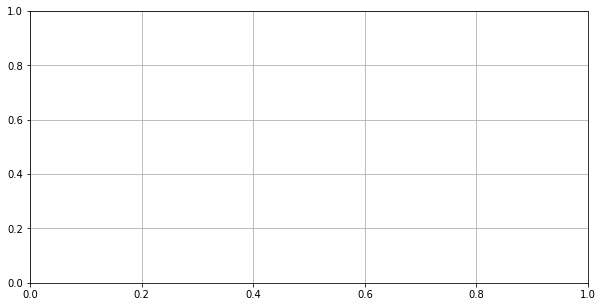

In [22]:
fig = plt.figure() 
axes1 = fig.add_subplot(1, 1, 1) 
# axes1 = fig.add_subplot(111) 

In [23]:
type(axes1)

matplotlib.axes._subplots.AxesSubplot

이 fig에 지불금액에 대한 histogram을 그려보자.

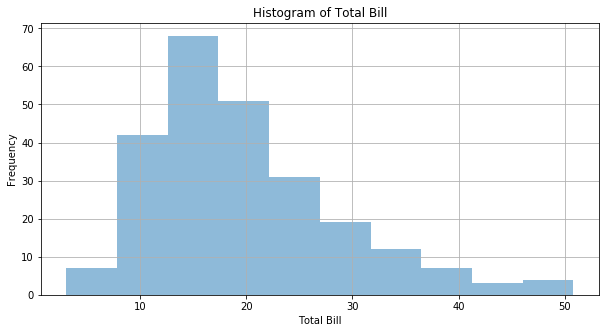

In [24]:
axes1.hist(tips['total_bill'], bins=10, alpha=.5)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Frequency') 

fig

#### [Quiz] 팁에 대한 히스토그램을 그려보자. 

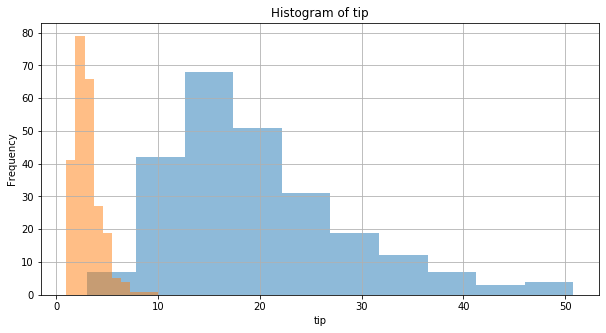

Text(0, 0.5, 'Frequency')

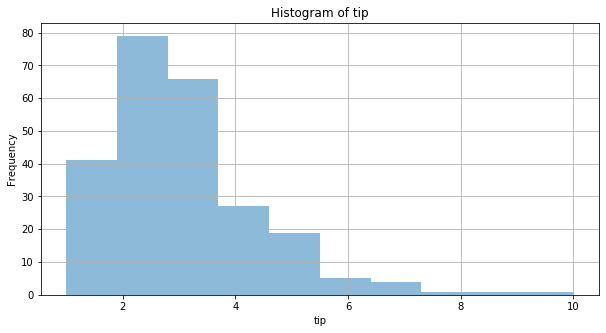

In [26]:
fig = plt.figure()
axes1 = fig.add_subplot(111)

axes1.hist(tips['tip'], bins=10, alpha=.5)
axes1.set_title('Histogram of tip')
axes1.set_xlabel('tip') 
axes1.set_ylabel('Frequency')

#### 산점도
이번에는 지불금액과 팁에 대한 산점도를 그려보자. 성별로 구분해볼까?

Text(0, 0.5, 'Tip')

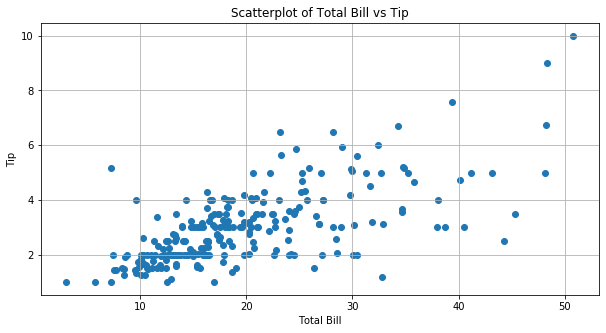

In [27]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot() 
axes1.scatter(tips['total_bill'], tips['tip']) 
axes1.set_title('Scatterplot of Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')

성별로 구분해볼까?

Text(0, 0.5, 'Tip')

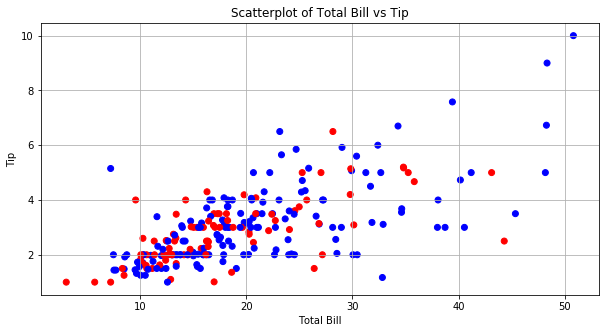

In [28]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot()
sexcol = np.where(tips.sex == 'Male', 'b', 'r')

axes1.scatter(tips['total_bill'], tips['tip'], c=sexcol) 
axes1.set_title('Scatterplot of Total Bill vs Tip') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')

[Quiz] size와 total_bill에 대한 산점도를 작성하라.

Text(0, 0.5, 'Total Bill')

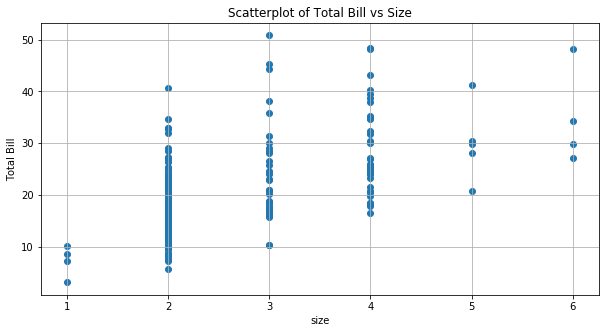

#### boxplot
성별로 팁에 대한 boxplot을 그려보자. 이를 위해 성별 팁에 대한 Series 데이터를 생성하여 리스트로 전달한다.

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

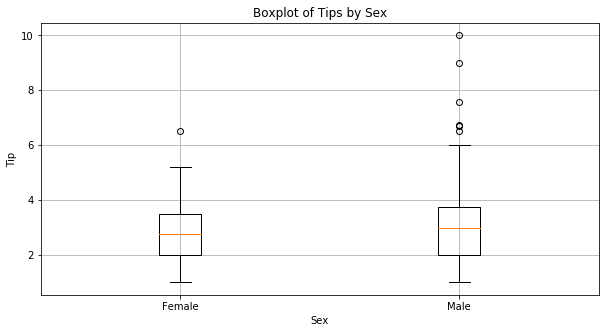

In [30]:
fig = plt.figure() 
axes1 = fig.add_subplot(1, 1, 1) 

axes1.boxplot( 
    [tips[tips['sex'] == 'Female']['tip'], 
     tips[tips['sex'] == 'Male']['tip']], 
    labels=['Female', 'Male'])

axes1.set_xlabel('Sex') 
axes1.set_ylabel('Tip') 
axes1.set_title('Boxplot of Tips by Sex')

박스플랏에서의 이상치 식별:
- x > Q3 + 1.5 * IQR
- x < Q1 - 1.5 * IQR 

#### [Quiz] 성별로 지불금액 대비 팁의 비율을 boxplot으로 그리면:

Text(0.5, 1.0, 'Boxplot of Tip Rate by Sex')

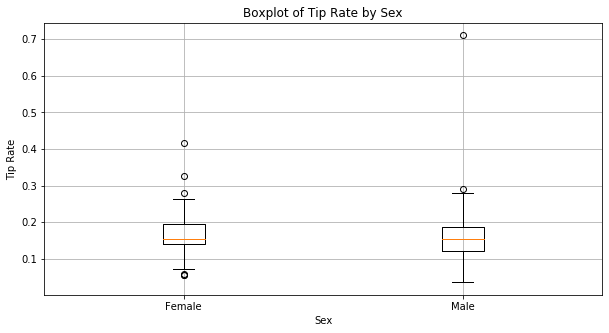

### 다변량 데이터로 다변량 그래프 그리기 ─ 산점도 그래프(89쪽)
3 변수 이상을 그래프로 시각화하는 것.

지불금액과 팁의 산점도에 성별을 색상으로 달리 표현해보자.

In [33]:
def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1

In [34]:
tips['sex_color'] = tips['sex'].map(recode_sex)

Text(0, 0.5, 'Tip')

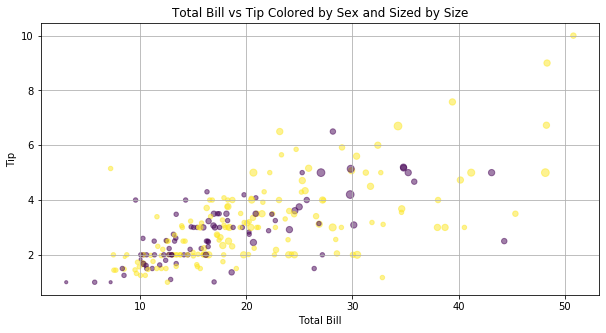

In [35]:
fig = plt.figure() 
axes1 = fig.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    s=tips['size'] * 10,    
    c=tips['sex_color'],
    alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

## seaborn으로 그리기
### 단변량 그래프 그리기 ― 히스토그램(91쪽)

In [36]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

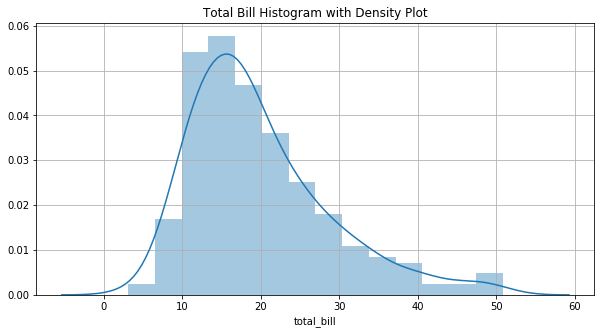

In [37]:
fig, ax = plt.subplots()
ax = sns.distplot(tips['total_bill']) 
ax.set_title('Total Bill Histogram with Density Plot')

Text(0, 0.5, 'Frequency')

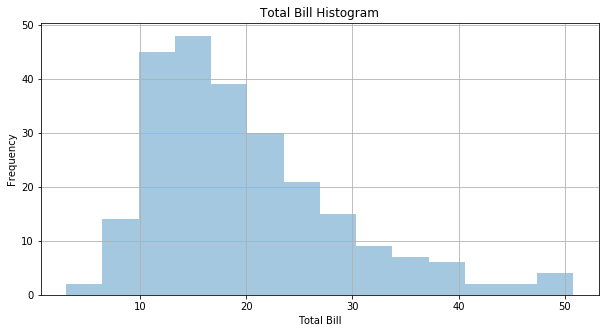

In [38]:
fig, ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], kde=False) 
ax.set_title('Total Bill Histogram') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Frequency')

kde는 kernel density estimate로서 데이터 공간에서의 밀도 분포를 예측하는 방법이다. 보통 gaussian kernel method를 사용한다.

자세한 내용은 https://scikit-learn.org/stable/modules/density.html 을 참고한다.

Text(0, 0.5, 'Unit Probability')

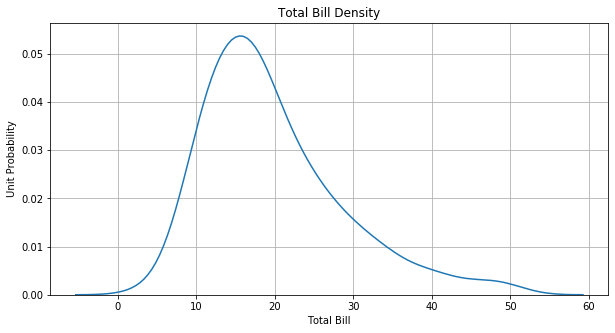

In [39]:
fig, ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], hist=False) 
ax.set_title('Total Bill Density') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Unit Probability')

러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.

Text(0.5, 0, 'Total Bill')

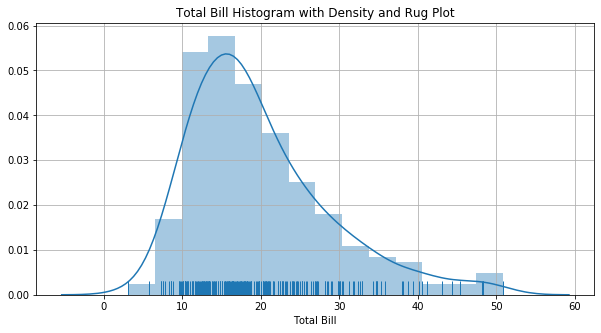

In [40]:
fig, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True) 
ax.set_title('Total Bill Histogram with Density and Rug Plot') 
ax.set_xlabel('Total Bill')

DataFrame의 범주형 변수에 대한 bar chart를 제공하는 countplot을 사용한다.

Text(0, 0.5, 'Frequency')

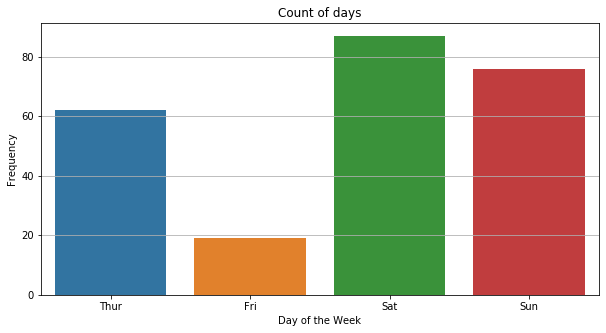

In [41]:
fig, ax = plt.subplots() 
ax = sns.countplot('day', data=tips) 
ax.set_title('Count of days') 
ax.set_xlabel('Day of the Week') 
ax.set_ylabel('Frequency')

## 다양한 종류의 이변량 그래프 그리기(95쪽)

### 1. seaborn 라이브러리로 산점도 그래프 그리기
seaborn 라이브러리는 matplotlib 라이브러리보다 다양한 방법으로 산점도 그래프를 그릴 수 있다. 산점도 그래프를 그리려면 seaborn 라이브러리의 regplot 함수를 사용한다.

Text(0, 0.5, 'Tip')

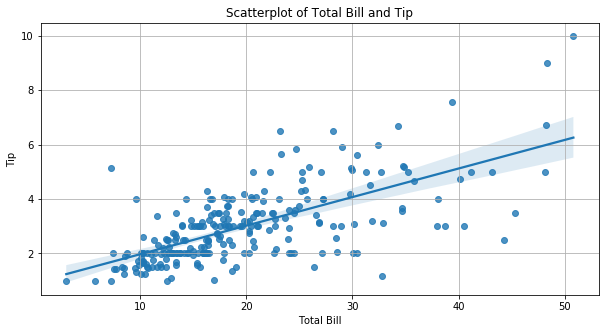

In [42]:
fig, ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

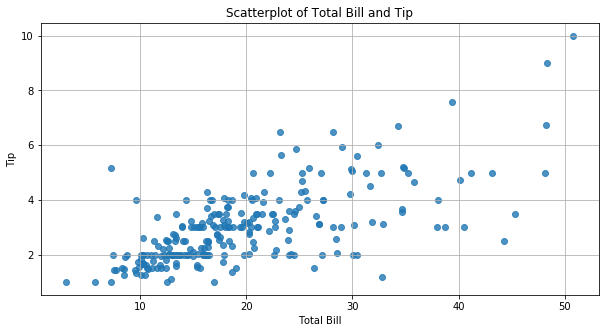

In [43]:
fig, ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

log를 이용한 산점도

In [44]:
log10tb = tips.total_bill.map(np.log10)
log10tip = tips.tip.map(np.log10)

(0.41969245816144507,
 1.7733951122260372,
 -0.22233992538792585,
 1.0709260996742072)

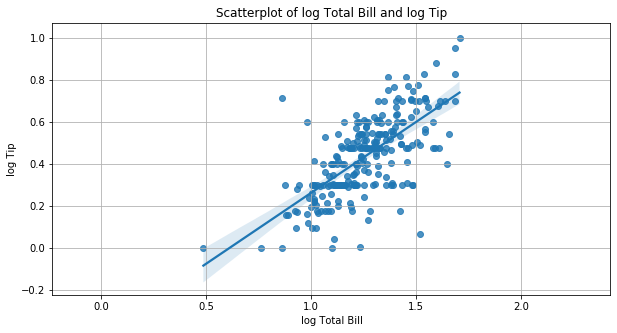

In [45]:
fig, ax = plt.subplots() 
ax = sns.regplot(x=log10tb, y=log10tip, fit_reg=True) 
ax.set_title('Scatterplot of log Total Bill and log Tip') 
ax.set_xlabel('log Total Bill') 
ax.set_ylabel('log Tip')
plt.axis('equal')

이번에는 산점도 그래프와 히스토그램을 한 번에 그려주는 jointplot 메서드를 사용해 보자.

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

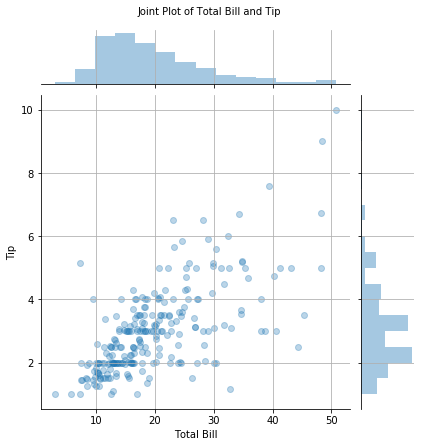

In [46]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips, alpha=.3) 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

JointGrid를 이용하야 joinplot을 좀 더 정밀하게 조정할 수 있다.

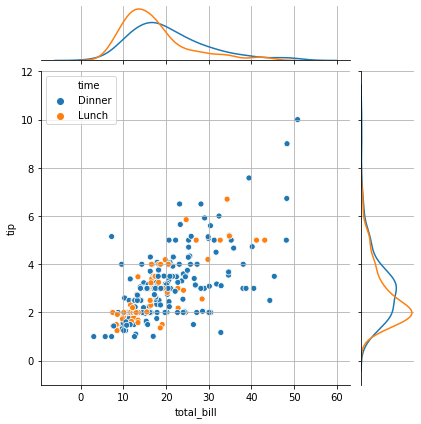

In [47]:
import seaborn as sns
grid = sns.JointGrid(x='total_bill', y='tip', data=tips)

g = grid.plot_joint(sns.scatterplot, hue='time', data=tips)
sns.kdeplot(tips.loc[tips['time']=='Dinner', 'total_bill'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(tips.loc[tips['time']=='Lunch', 'total_bill'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(tips.loc[tips['time']=='Dinner', 'tip'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(tips.loc[tips['time']=='Lunch', 'tip'], ax=g.ax_marg_y, vertical=True, legend=False)

산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다. 산점도 그래프의 데이터 밀도를 구분하기 쉽게 그리고 싶다면 육각 그래프(hexbin)를 사용하면 된다.

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

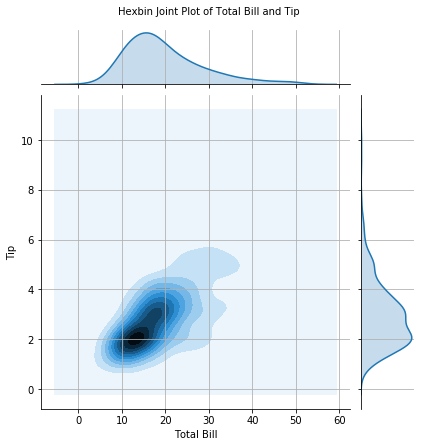

In [48]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

### 4. 이차원 밀집도 그리기
이차원 밀집도는 kdeplot 메서드로 만들 수 있다. 이때 shade 옵션 값을 True로 지정하면 그래프에 음영 효과를 줄 수 있다.

Text(0, 0.5, 'Tip')

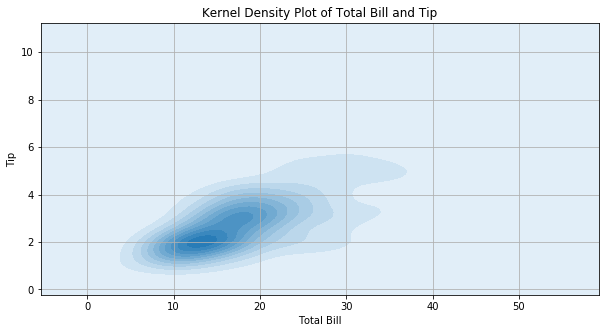

In [49]:
kde, ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

### 5. 바 그래프 그리기
점심과 저녁 식사에 대한 평균 지불비용을 그려보자. estimator의 기본 값이 mean이므로 평균을 계산한다.

Text(0, 0.5, 'Average total bill')

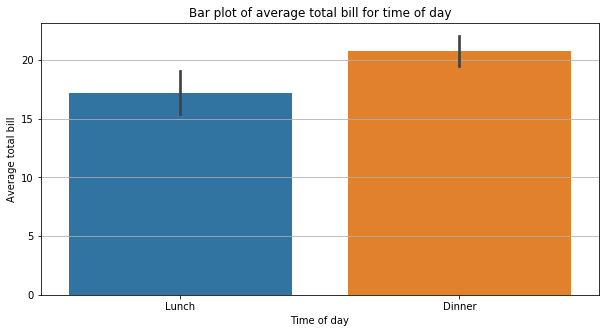

In [50]:
fig, ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips) 
ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Average total bill')

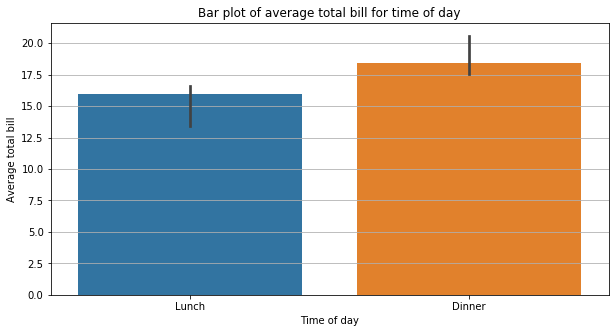

In [51]:
fig, ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips, estimator=np.median) 
ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

[Quiz] day 별로 tiprate를 그려보자.

Text(0, 0.5, 'Average tip rate')

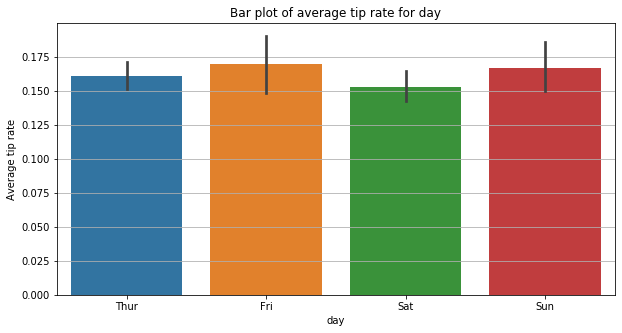

### 6. 박스 그래프 그리기
pyplot의 boxplot과 달리, sns의 boxplot 함수는 x에 범주형 변수를 y에 연속형 변수를 지정하면, 자동으로 범주별 boxplot을 그려준다.

Text(0, 0.5, 'Total Bill')

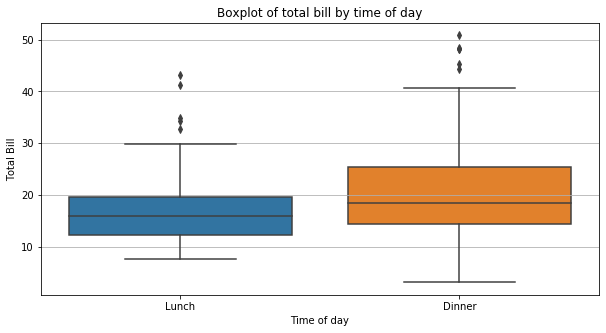

In [53]:
fig, ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

boxplot은 range만을 표시할 뿐 데이터의 밀도를 이해하기는 어렵다. 이에 kde를 이용하여 데이터의 분포까지도 표시하는 violinplot을 이용하면 range와 분포까지도 시각화할 수 있다.

Text(0, 0.5, 'Total Bill')

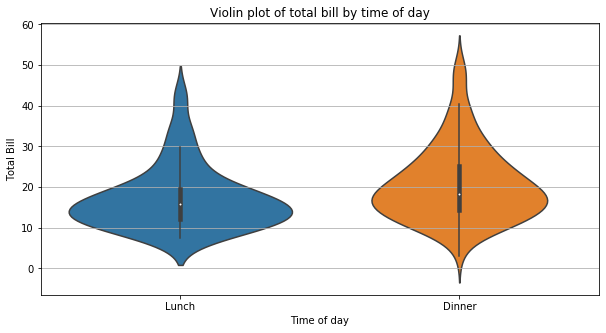

In [54]:
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

위 violinplot을 boxplot과 비교해보면, kde를 사용하므로, 실제 데이터가 없는 영역도 밀도가 표시되는 문제가 있으므로, 이를 고려하여 해석해야 한다.

### 8. 관계 그래프 그리기
모든 연속형 변수에 대해 산점도와 히스토그램을 한번에 보여준다.

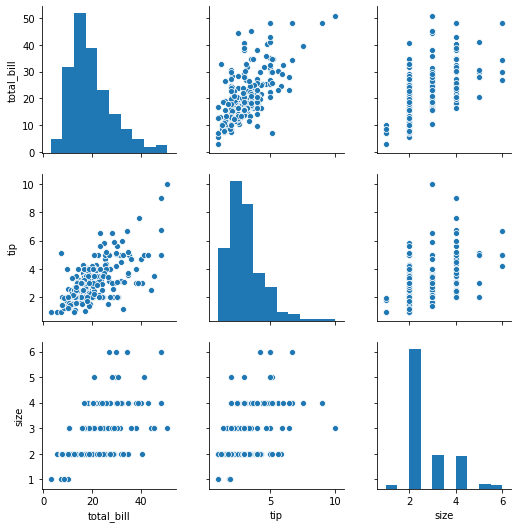

In [77]:
fig = sns.pairplot(tips)

pairplot을 더 발전시켜, 각 연속형 변수쌍에 대한 Grid figure를 생성하고:
- map_upper에 regplot을 그려 대각 상단 삼각셀에 산점도와 회귀선을
- map_diag에 distplot을
- map_lower에 kdeplot으로 두 변수간 분포밀도를 그릴 수 있다.

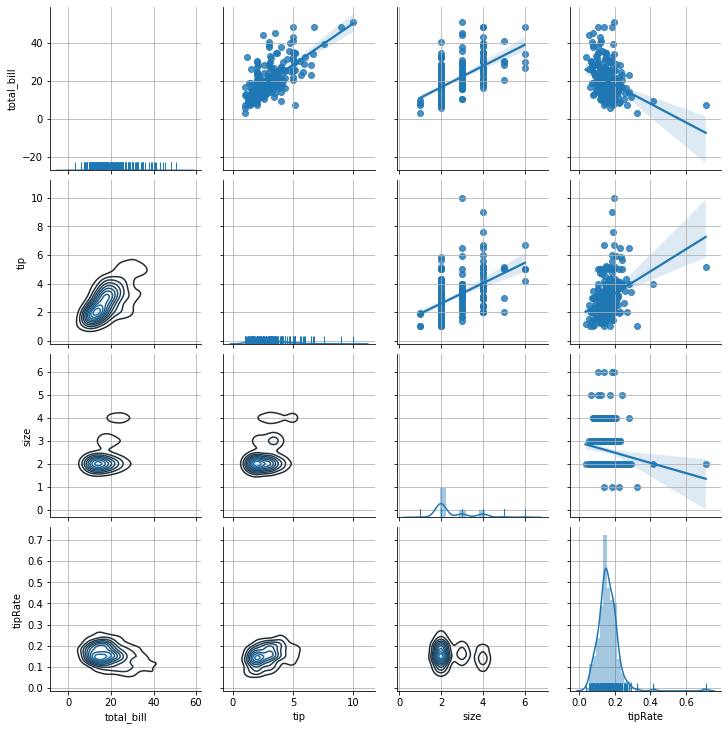

In [55]:
plt.close('all')
sns.PairGrid(tips).map_upper(sns.regplot).map_lower(sns.kdeplot).map_diag(sns.distplot, rug=True) 
plt.show()

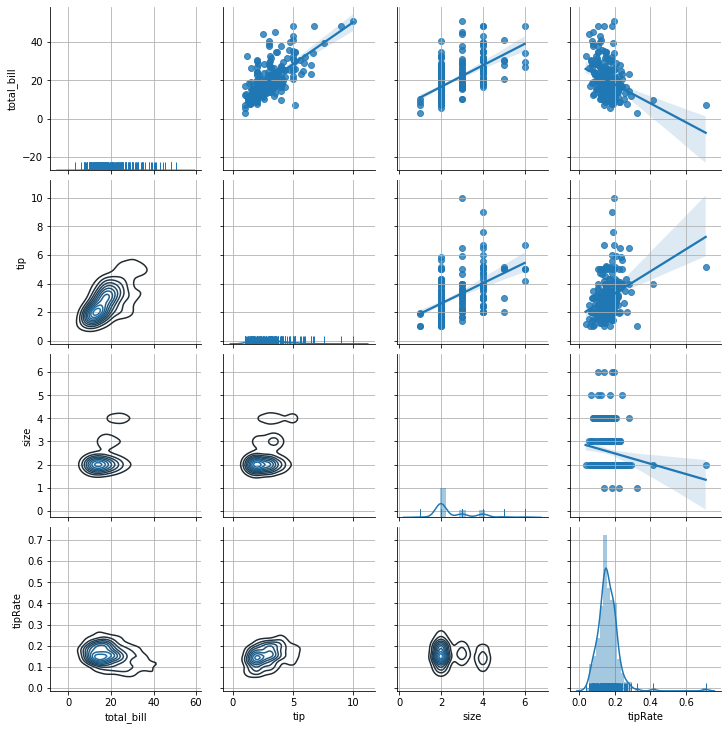

In [56]:
pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) 
plt.show()

### 다변량 그래프 그리기(103쪽)

### 1. seaborn 라이브러리로 바이올린 그래프 그리기 ― 색상 추가
남녀별로 서로 다른 분포를 시각화하기 위해 비대칭 violinplot을 그린다. 이때, hue에 sex를 설정한다.

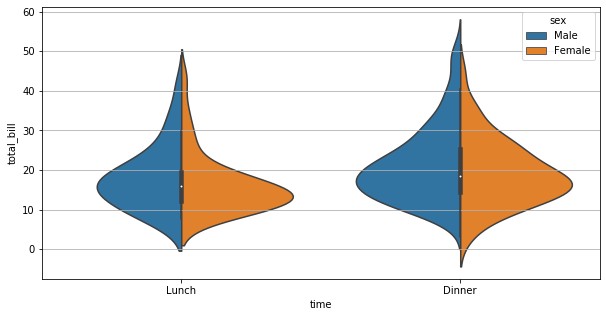

In [57]:
violin, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, 
                    split=True) 
plt.show()

### 2. 산점도, 관계 그래프 그리기 ― 색상(hue) 추가
HSV 컬러모델에 대한 이해:
![HSV](http://c2down.cyworld.co.kr/download?fid=64222bd7b83d9d184b062bd7c27a3b01&name=1368094767.jpg)
![hue 값에 따른 생상](http://c2down.cyworld.co.kr/download?fid=64222bd7b83d9d1827c72bd7c2b54c01&name=1363590519.png)

regplot과 유사하게 산점도와 회귀직선을 그릴 수 있지만, hue(색상) 옵션을 통헤 색상을 달리 설정할 수 있다.

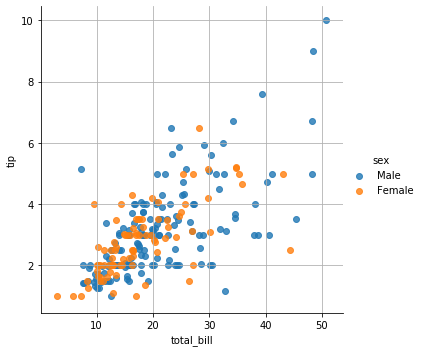

In [58]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', 
                     fit_reg=False) 
plt.show()

hue에 지정되는 기본 색상이 마음이 들지 않으면 palette 옵션을 통해 변경할 수 있다.

다양한 빠레뜨에 대한 값은 [관련 문서](https://seaborn.pydata.org/tutorial/color_palettes.html)를 참고한다.

여기서는 flatui 빠레뜨를 사용해보자.

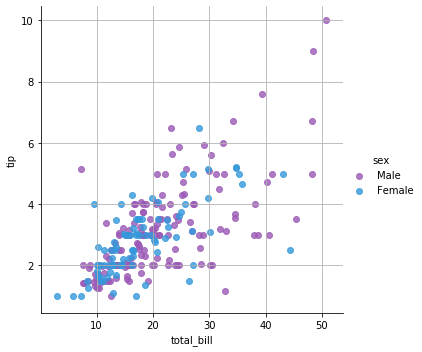

In [59]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, 
                     hue='sex', fit_reg=False, palette=flatui) 
plt.show()

pairplot도 hue 옵션을 통해 색상을 선택할 수 있다.

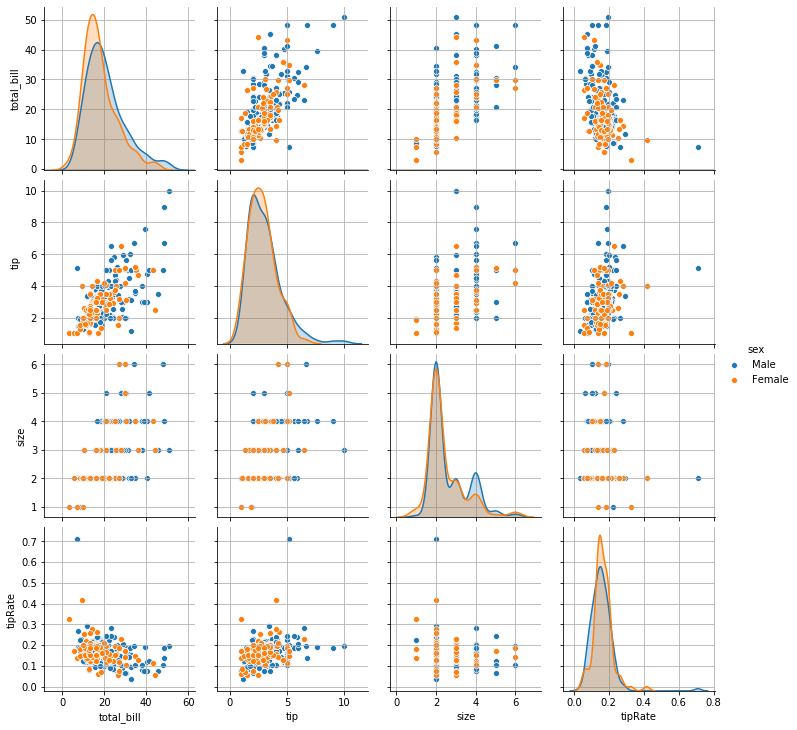

In [60]:
fig = sns.pairplot(tips, hue='sex')

### 3. 산점도 그래프의 크기와 모양 조절하기
pyplot의 scatter 함수의 옵션을 scatter_kws 옵션을 통해 dictionary 형태로 설정할 수 있다. 이때 legend가 자동으로 생성된다.

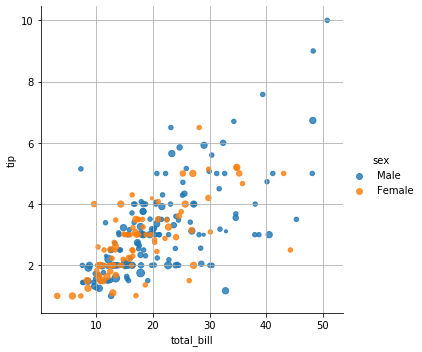

In [61]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, 
                     hue='sex', scatter_kws={'s': tips['size']*10}) 
plt.show()

[Quiz] size와 sex 별로 크로스 테이블을 작성하라

In [62]:
tipss = tips.copy()
tipss['cnt'] = 1

In [64]:
tipss.groupby(['size', 'sex'])['cnt'].sum().unstack()

sex,Male,Female
size,,
1,1,3
2,98,58
3,24,14
4,28,9
5,4,1
6,2,2


In [65]:
tips[['size', 'sex']].groupby(['size', 'sex']).agg('size').unstack()

sex,Male,Female
size,,
1,1,3
2,98,58
3,24,14
4,28,9
5,4,1
6,2,2


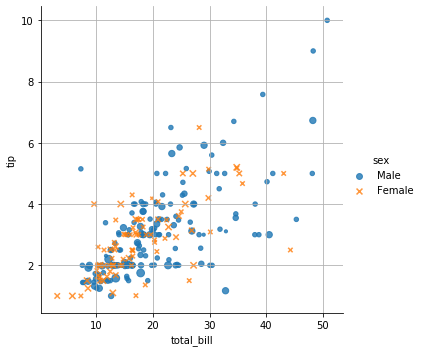

In [66]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', 
                     markers=['o', 'x'], scatter_kws={'s': tips['size']*10}) 
plt.show()

### 5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

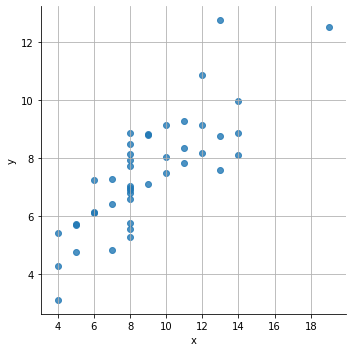

In [67]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

그룹별로 쉽게 나눠 그리는 방법은 컬럼을 의미는 col에 그룹을 지정하고, col_wrap에 열의 최대값을 설정하면 된다.

In [73]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


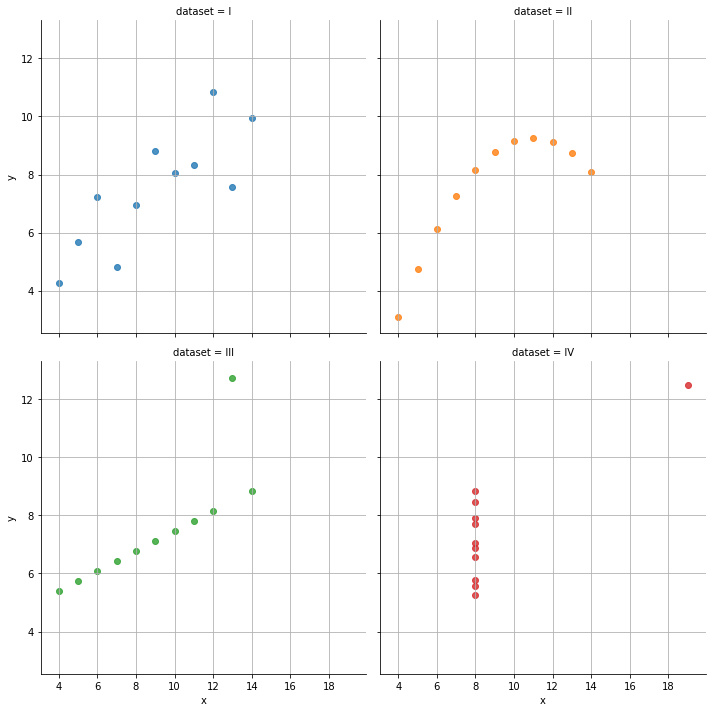

In [68]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, 
                           col='dataset', col_wrap=2, hue='dataset')

<font color='red'> [Quiz] </font> tips 데이터를 이용하여, tip과 total_bill로 산점도를 그리되, sex와 smoker 별로 2x2 lmplot을 그려본다.

색을 달리하기 위해, sex와 smpoker를 모두 구분지을 수 있는 새로운 categrical 변수를 생성하여 hue 에 지정해야 한다.

In [74]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tipRate,sexsmok
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,FemaleNo
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,MaleNo
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,MaleNo
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,MaleNo
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,FemaleNo


### 알아두면 좋아요!
#### FacetGrid 클래스로도 그룹별 그래프를 그릴 수 있습니다(108쪽)

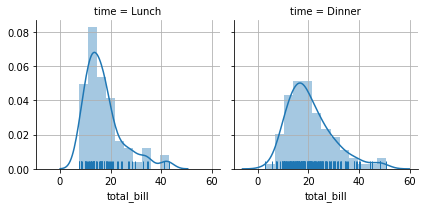

In [78]:
facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.distplot, 'total_bill', rug=True)

FacetGrid는 plt.subplots 처럼 여러 ax를 생성하지만, 차이점이 있다면, 입력된 DataFrame의 정보를 유지하여, axes의 array라기 보다는 axes의 Series로 동작한다. 따라서 이에 대한 map 함수가 존재한다.

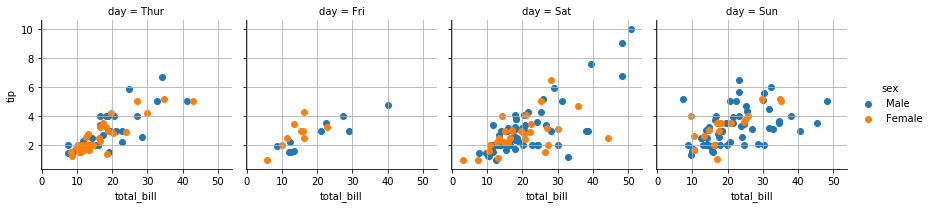

In [79]:
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend()

[Quiz] 위 이미지를 2, 2 이미지로 그려라.

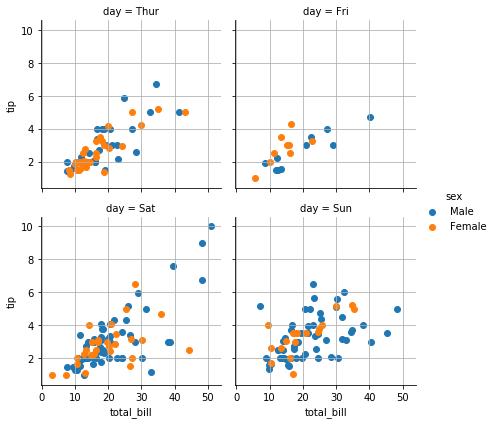

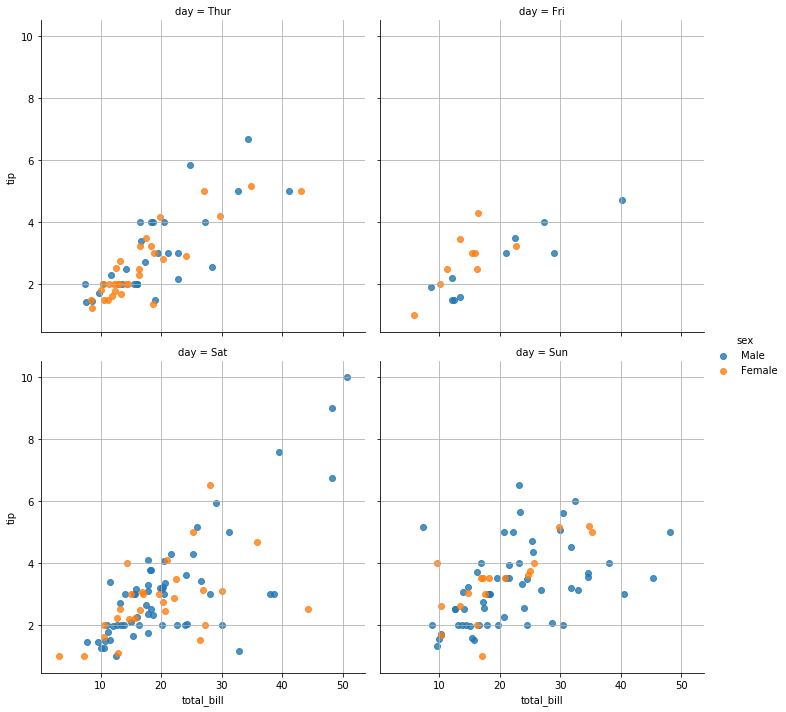

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


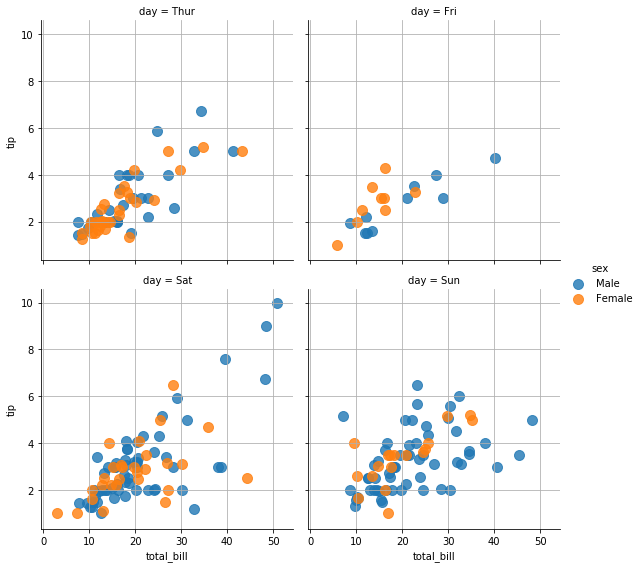

이번에는 다양한 범주에 대해 Facet을 적용해보자.

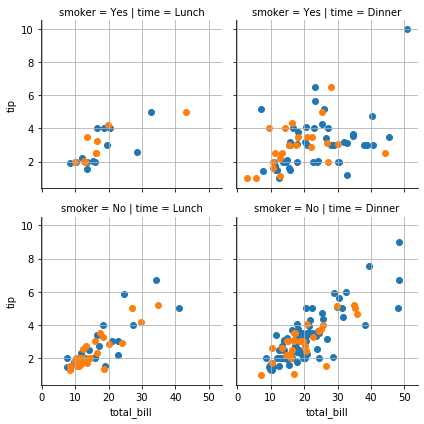

In [84]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip')

### 데이터프레임과 시리즈로 그래프 그리기(110쪽)
panda의 plot 메소드로 바로 그래프를 그릴 수 있다.
- df.plot(kind=' '): bar, box, hist, pie, scatter, area
- df.plot.bar(), df.plot.box(), ...

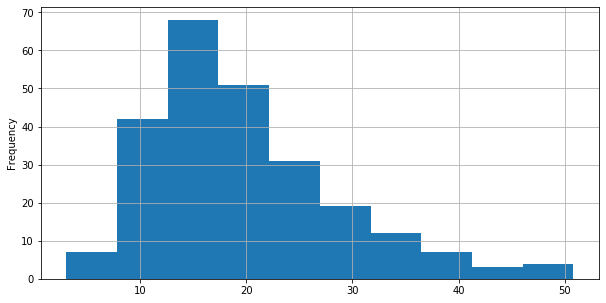

In [85]:
tips['total_bill'].plot.hist()

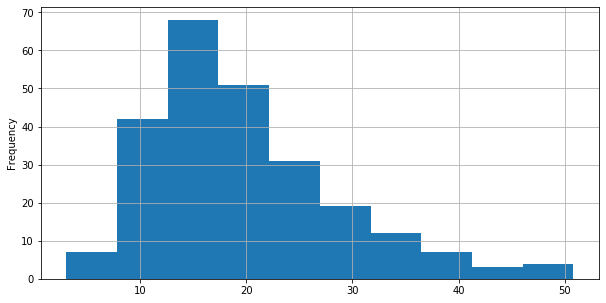

In [86]:
ax = tips['total_bill'].plot(kind='hist')

두개의 변수에 대해 한번에 히스토그램을 그릴 수 있다.

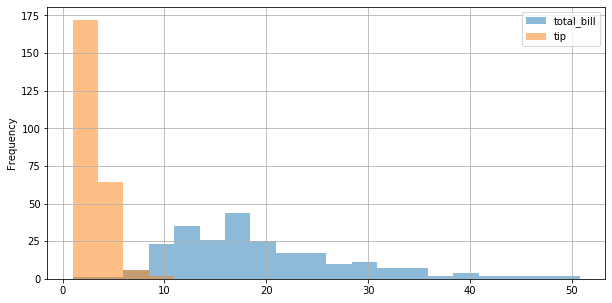

In [87]:
# fig, ax = plt.subplots() 
# ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)
tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20)

pandas의 plot 메소드를 이용하는 방법

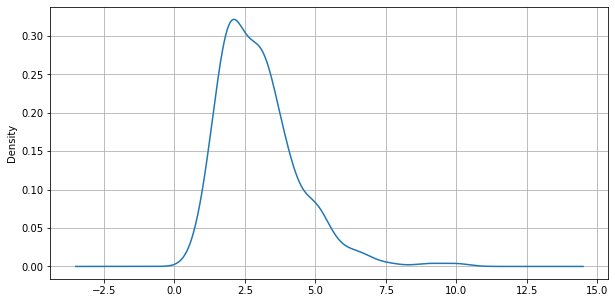

In [88]:
tips['tip'].plot.kde()

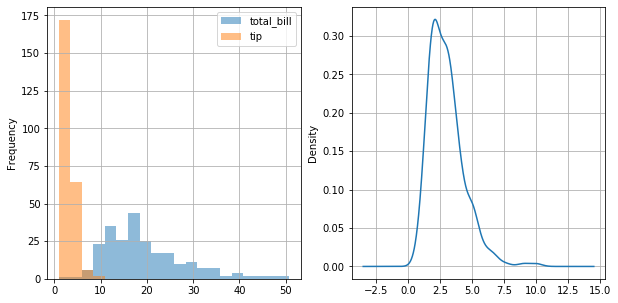

In [89]:
fig, axes = plt.subplots(1, 2)
tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=axes[0])
tips['tip'].plot.kde(ax=axes[1]) 

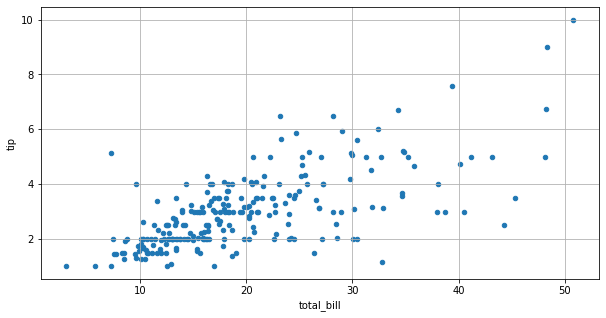

In [90]:
fig, ax = plt.subplots() 
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

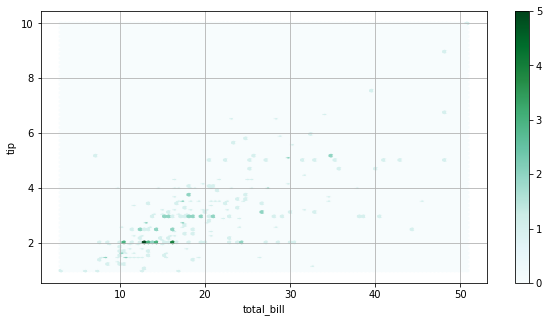

In [91]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax) 

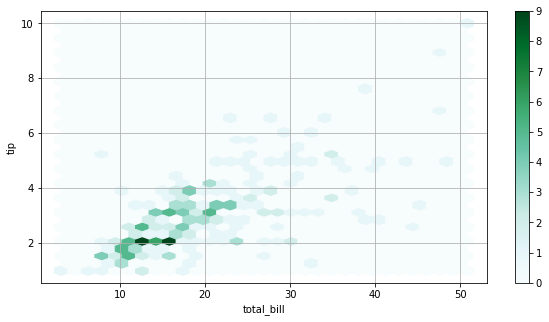

In [92]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=30, ax=ax)

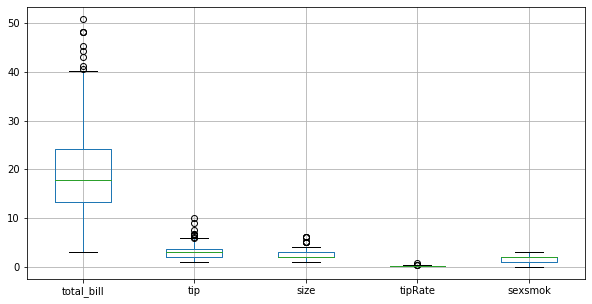

In [93]:
fig, ax = plt.subplots() 
ax = tips.plot.box(ax=ax)

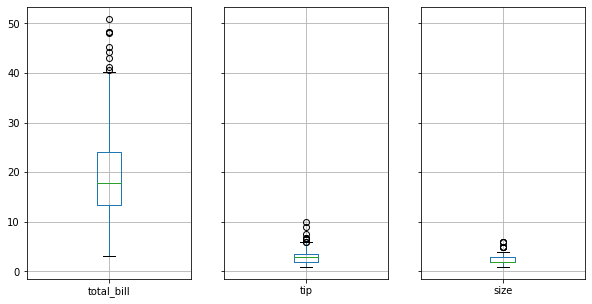

In [95]:
fig, axes = plt.subplots(1, 3, sharey=True) 
boxBill = tips['total_bill'].plot.box(ax=axes[0]) 
boxTip = tips['tip'].plot.box(ax=axes[1]) 
boxSize = tips['size'].plot.box(ax=axes[2]) 

<font color="red">[Quiz]</font> FacetGrid로 생성한 아래와 같은 그림을 pandas의 plot 메소드로 그려보자.
![](https://i.imgur.com/tPkPNHS.png)

아래와 같은 방법으로 문제를 해결한다.
1. 현재 seaborn의 palette에 있는 색을 찾아내자.
2. 색과 sex를 매팅하는 사전을 정의한다.
3. plt.subplots를 이용하여 각 ax에 tips의 plot 메소드로 그려넣는다.

먼저 현재 seaborn의 palette에 있는 색을 찾아내자.

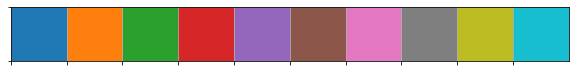

In [96]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

성별로 서로 다른 색상을 적용하기 위해 단지 첫 2개의 색상만 필요하다.

In [97]:
current_palette[:2]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725)]

이 색들은 3차원의 RGB 색상값으로 0 ~ 1 값은 갖는다. 이를 pyplot에서 이해할 수 있는 RGB 포맷의 문자열("#ffffff")로 변경하자.

In [31]:
 hex(round(current_palette[0][0] * 255))

'0x1f'

In [98]:
cur_colors = {}
sexes = ['Male', 'Female']
for i in range(2):
    col = []
    for j in range(3):
        tmpstr = hex(round(current_palette[i][j] * 255))[2:]
        tmpstr = '0' + tmpstr if len(tmpstr) < 2 else tmpstr
        col.append(tmpstr)
    cur_colors[sexes[i]]= '#' + ''.join(col)
cur_colors

{'Male': '#1f77b4', 'Female': '#ff7f0e'}

이제, 이 cur_colors를 이용하여 plt.subplots의 각 ax에 산점도를 그려넣자.

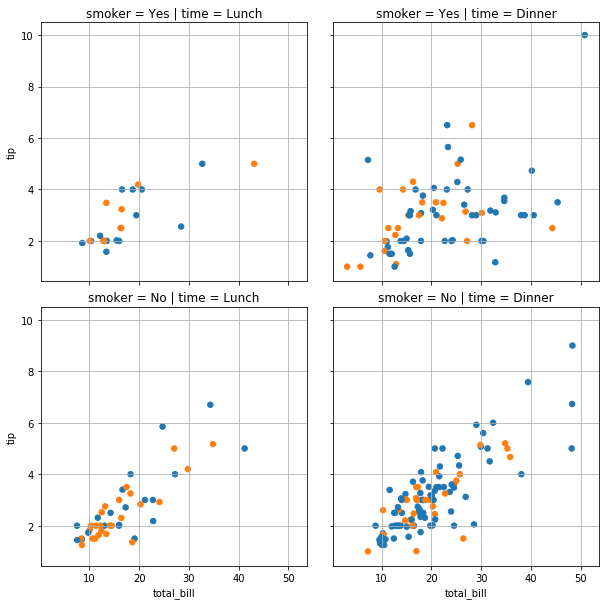

### 그래프에 스타일 적용하기(114쪽)
seaborn 라이브러리로 만든 그래프는 모두 기본 스타일이었다. 

seaborn 라이브러리로 만든 그래프의 스타일은 set_style 메서드를 사용하여 바꿀 수 있으며, 이를 실행한 이후의 모든 그래프는 지정한 스타일로 바뀐다.

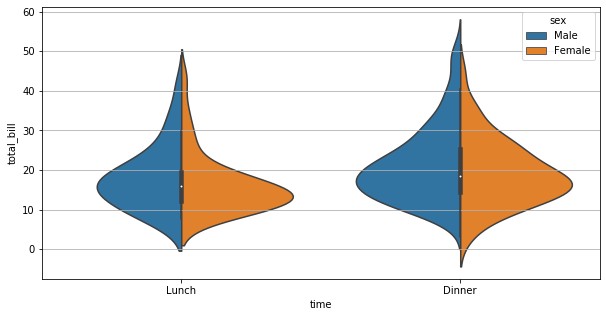

In [100]:
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

whitegrid로 스타일을 변경하며, y축에 대한 그리드 선이 나타난다. 이 스타일은 이후로 계속 유지된다.

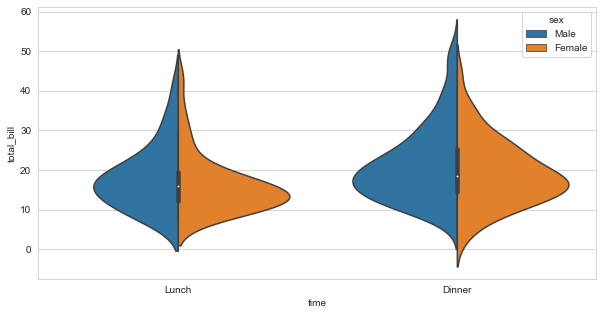

In [101]:
sns.set_style('whitegrid')
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

이 설정은 계속 유지되며, boxplot에서 나타나지 않은 x축에 대한 grid bar를 추가로 보여준다.

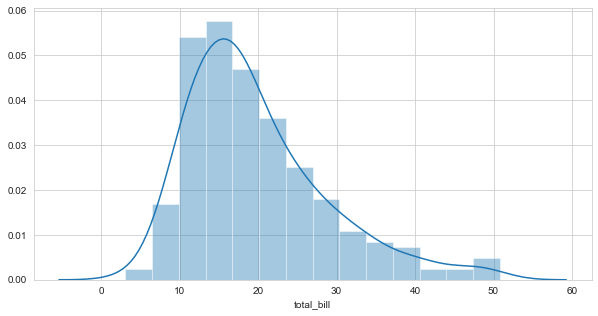

In [102]:
sns.distplot(tips['total_bill']) 

다음은 for 문을 돌며 다양한 스타일로 그래프를 그리는 방법을 안내한다.

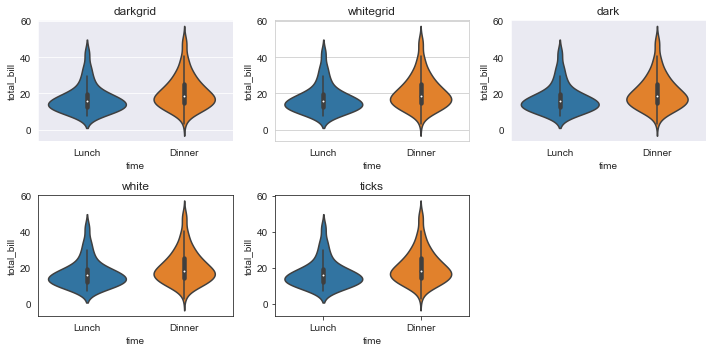

In [103]:
fig = plt.figure() 
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] 
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', 
                                data=tips, ax=ax)
        violin.set_title(style) 
        
fig.tight_layout()

- ticks는 white에 비해 xticks와 yticks를 명확히 보여준다.

seaborn으로 그리는 다양한 예제: https://seaborn.pydata.org/examples/index.html

matplotlib의 다양한 예제: https://matplotlib.org/3.1.1/gallery/index.html

기타 갤러리: https://python-graph-gallery.com/

pandas plot, pyplot, seaborn의 차이 이해: http://blog.naver.com/PostView.nhn?blogId=owl6615&logNo=221572486986&parentCategoryNo=118&categoryNo=113&viewDate=&isShowPopularPosts=false&from=postView